In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

column_names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                'Color intensity','Hue','OD280/OD315','Proline']

data = pd.read_csv("wine.data", header=None, names=column_names)

binary_data = data[data['Class'].isin([1,2])]
binary_data['Class'] = binary_data['Class'].map({1:0, 2:1})

X = binary_data.drop('Class', axis=1).values
y = binary_data['Class'].values.flatten()

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Data Loaded:", X.shape, y.shape)


Data Loaded: (130, 13) (130,)


In [ ]:
# Logistic Regression 
model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100000)
model.fit(X, y)

# Baseline loss (L*)
baseline_loss = log_loss(y, model.predict_proba(X))
print(f"Baseline Logistic Loss L*: {baseline_loss:.8f}")


Baseline Logistic Loss L*: 0.00000073


In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [33]:
import random as ran

def random_coordinate_descent(X, y, max_iter=50000, learning_rate=0.01, tol=1e-5):
    m, n = X.shape
    loss_history = []
    iteration_history = []

    w = np.zeros(n)

    for iter in range(max_iter):
        i = ran.choice(range(n))
        y_pred = sigmoid(X.dot(w))
        diff = y_pred - y
        grad = diff.dot(X[:, i]) / m
        w[i] -= learning_rate * grad

        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)

            if loss < tol:
                break

    return w, loss_history, iteration_history


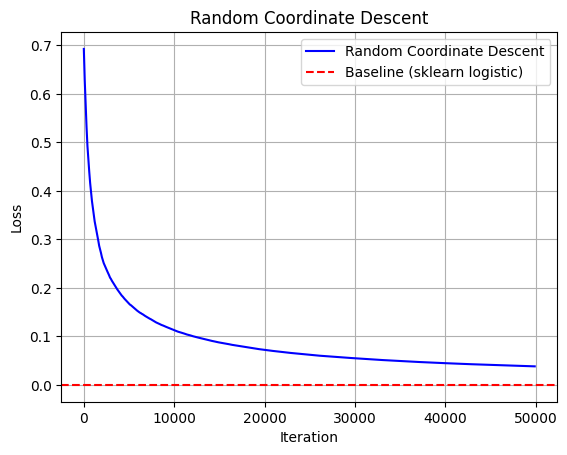

In [34]:
weights_rand, loss_history_rand, iteration_history_rand = random_coordinate_descent(X, y)

plt.plot(iteration_history_rand, loss_history_rand, label='Random Coordinate Descent', color='blue')
plt.axhline(y=baseline_loss, color='red', linestyle='--', label='Baseline (sklearn logistic)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Random Coordinate Descent')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
def greedy_coordinate_descent(X, y, max_iter=50000, learning_rate=0.01, tol=1e-5):
    m, n = X.shape
    loss_history = []
    iteration_history = []
    w = np.zeros(n)

    for iter in range(max_iter):
        y_pred = sigmoid(X.dot(w))
        diff = y_pred - y
        grad = diff.dot(X) / m

        max_grad_index = np.argmax(np.abs(grad))
        max_grad = grad[max_grad_index]
        w[max_grad_index] -= learning_rate * max_grad

        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)

            if loss < tol:
                break

    return w, loss_history, iteration_history

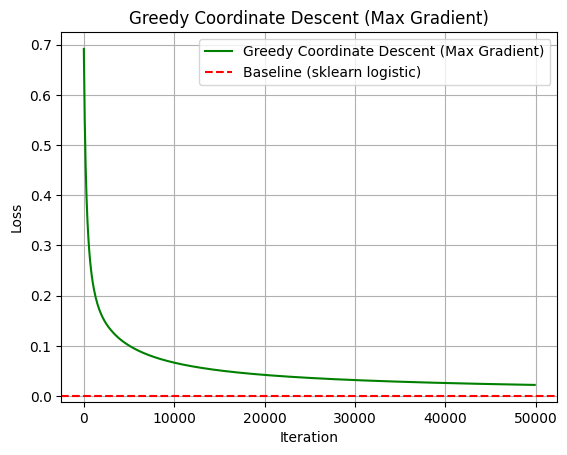

In [36]:
weights_grad, loss_history_grad, iteration_history_grad = greedy_coordinate_descent(X, y)


plt.plot(iteration_history_grad, loss_history_grad, label='Greedy Coordinate Descent (Max Gradient)', color='green')
plt.axhline(y=baseline_loss, color='red', linestyle='--', label='Baseline (sklearn logistic)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Greedy Coordinate Descent (Max Gradient)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
def adaptive_coordinate_descent(X, y, max_iter=50000, learning_rate=0.1, decay_rate=1e-4, tol=1e-5):
    m, n = X.shape
    loss_history = []
    iteration_history = []
    w = np.zeros(n)

    for iter in range(max_iter):
        y_pred = sigmoid(X.dot(w))
        diff = y_pred - y
        grad = diff.dot(X) / m

        max_grad_index = np.argmax(np.abs(grad))
        max_grad = grad[max_grad_index]

        w[max_grad_index] -= learning_rate * max_grad
        learning_rate = learning_rate / (1 + decay_rate * iter)  # Adaptive Learning Rate

        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)

            if loss < tol:
                break

    return w, loss_history, iteration_history


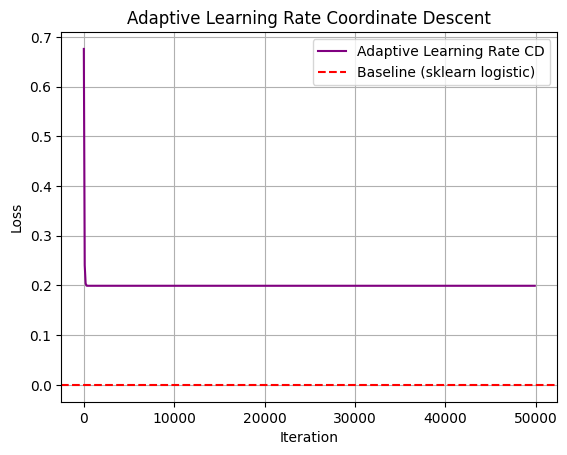

In [38]:
weights_adap, loss_history_adap, iteration_history_adap = adaptive_coordinate_descent(X, y)

plt.plot(iteration_history_adap, loss_history_adap, label='Adaptive Learning Rate CD', color='purple')
plt.axhline(y=baseline_loss, color='red', linestyle='--', label='Baseline (sklearn logistic)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Adaptive Learning Rate Coordinate Descent')
plt.legend()
plt.grid(True)
plt.show()

In [40]:

_, loss_random, iter_random = random_coordinate_descent(X, y)
_, loss_greedy, iter_greedy = greedy_coordinate_descent(X, y)
_, loss_adaptive, iter_adaptive = adaptive_coordinate_descent(X, y)

print("Final Log Loss (Random):", loss_random[-1])
print("Final Log Loss (Greedy):", loss_greedy[-1])
print("Final Log Loss (Adaptive):", loss_adaptive[-1])


Final Log Loss (Random): 0.0381809225425497
Final Log Loss (Greedy): 0.02207134443116343
Final Log Loss (Adaptive): 0.19936454328347405


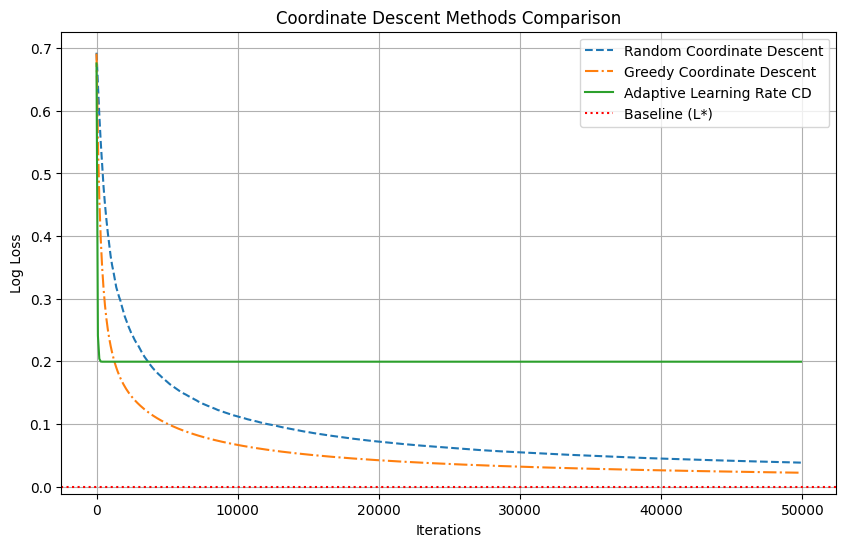

In [41]:
plt.figure(figsize=(10, 6))

# Random
plt.plot(iter_random, loss_random, label='Random Coordinate Descent', linestyle='--')

# Greedy
plt.plot(iter_greedy, loss_greedy, label='Greedy Coordinate Descent', linestyle='-.')

# Adaptive
plt.plot(iter_adaptive, loss_adaptive, label='Adaptive Learning Rate CD', linestyle='-')

# Baseline L*
plt.axhline(y=baseline_loss, color='red', linestyle=':', label='Baseline (L*)')

plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Coordinate Descent Methods Comparison')
plt.legend()
plt.grid(True)
plt.show()


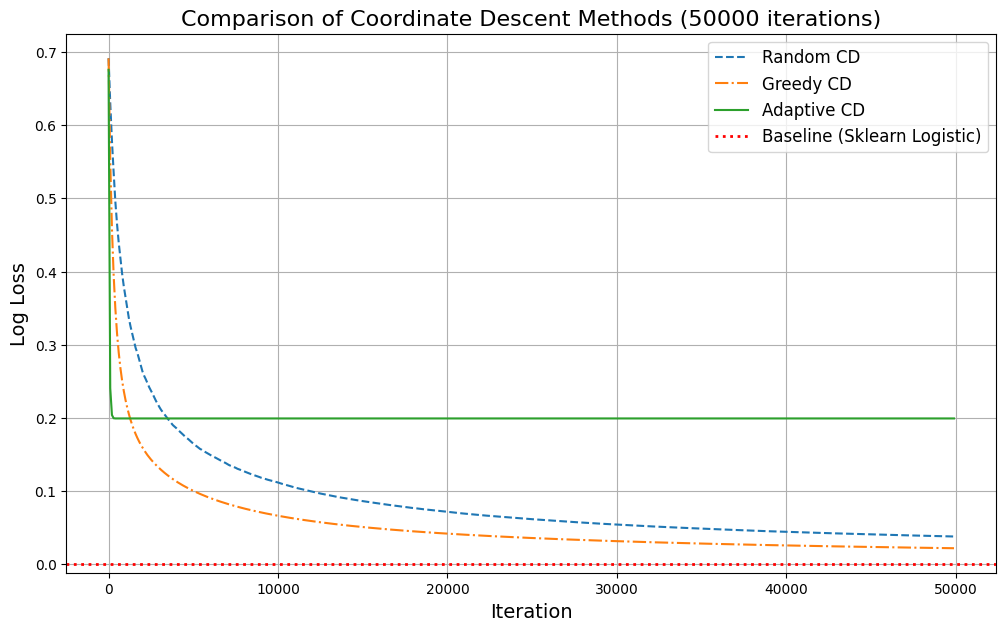

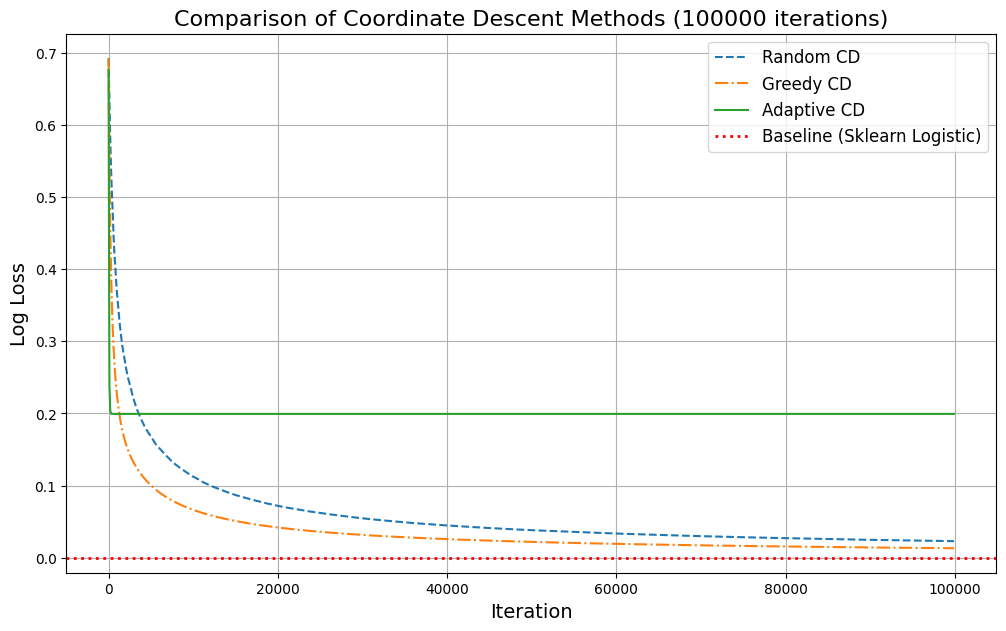

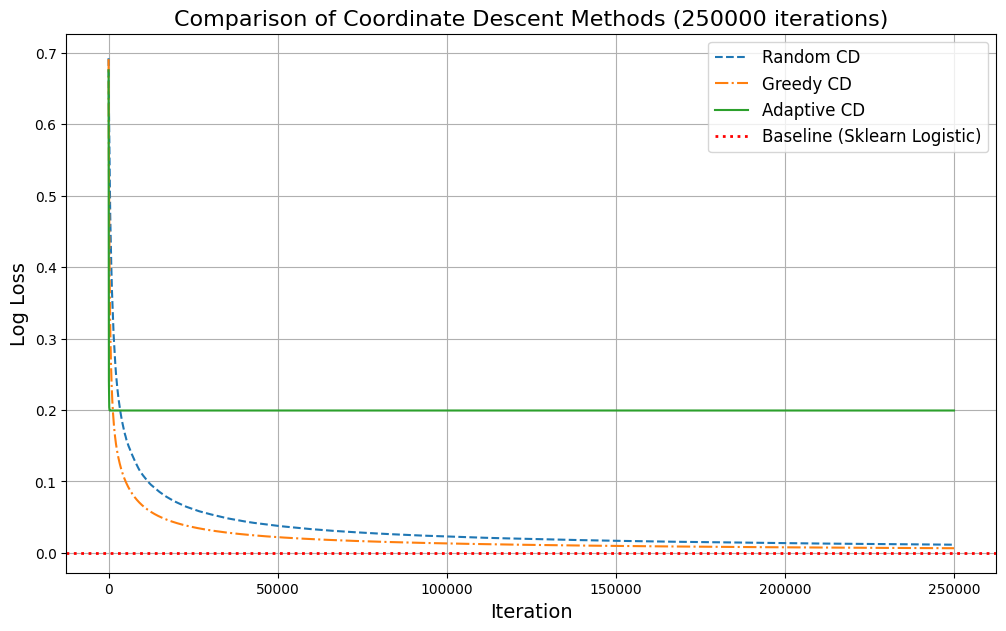

In [42]:
def random_coordinate_descent(X, y, max_iter, learning_rate=0.01, tol=1e-5):
    m, n = X.shape
    loss_history, iteration_history = [], []
    w = np.zeros(n)
    for iter in range(max_iter):
        i = ran.choice(range(n))
        grad = ((sigmoid(X.dot(w)) - y).dot(X[:, i])) / m
        w[i] -= learning_rate * grad
        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)
            if loss < tol:
                break
    return loss_history, iteration_history

# Greedy Coordinate Descent
def greedy_coordinate_descent(X, y, max_iter, learning_rate=0.01, tol=1e-5):
    m, n = X.shape
    loss_history, iteration_history = [], []
    w = np.zeros(n)
    for iter in range(max_iter):
        grads = ((sigmoid(X.dot(w)) - y).dot(X)) / m
        coord = np.argmax(np.abs(grads))
        w[coord] -= learning_rate * grads[coord]
        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)
            if loss < tol:
                break
    return loss_history, iteration_history

# Adaptive Coordinate Descent
def adaptive_coordinate_descent(X, y, max_iter, learning_rate=0.1, decay_rate=1e-4, tol=1e-5):
    m, n = X.shape
    loss_history, iteration_history = [], []
    w = np.zeros(n)
    for iter in range(max_iter):
        grads = ((sigmoid(X.dot(w)) - y).dot(X)) / m
        coord = np.argmax(np.abs(grads))
        w[coord] -= learning_rate * grads[coord]
        learning_rate /= (1 + decay_rate * iter)
        if iter % 100 == 0:
            loss = log_loss(y, sigmoid(X.dot(w)))
            loss_history.append(loss)
            iteration_history.append(iter)
            if loss < tol:
                break
    return loss_history, iteration_history

# Baseline
model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100000)
model.fit(X, y)
baseline_loss = log_loss(y, model.predict_proba(X))

# Iterations
iterations = [50000, 100000, 250000]

for max_iter in iterations:
    plt.figure(figsize=(12, 7))
    
    loss_rand, iter_rand = random_coordinate_descent(X, y, max_iter)
    loss_greedy, iter_greedy = greedy_coordinate_descent(X, y, max_iter)
    loss_adap, iter_adap = adaptive_coordinate_descent(X, y, max_iter)
    
    plt.plot(iter_rand, loss_rand, label='Random CD', linestyle='--', linewidth=1.5)
    plt.plot(iter_greedy, loss_greedy, label='Greedy CD', linestyle='-.', linewidth=1.5)
    plt.plot(iter_adap, loss_adap, label='Adaptive CD', linestyle='-', linewidth=1.5)
    plt.axhline(y=baseline_loss, color='red', linestyle=':', linewidth=2, label='Baseline (Sklearn Logistic)')
    
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Log Loss', fontsize=14)
    plt.title(f'Comparison of Coordinate Descent Methods ({max_iter} iterations)', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()